In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [15]:
# Load the content of the first sheet
data = pd.read_excel('Cleaned_DatasetBNB.xlsx', sheet_name='Sheet1')

In [16]:
# Preprocessing: Convert the list of words to a single string
data['Words'] = data['Words'].apply(lambda x: ' '.join(eval(x)))  # Ensure x is converted from a list to a string
X = data['Words']
y = data['Label']

In [17]:
# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Convert text data into a binary feature matrix using CountVectorizer
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [19]:
# Train the Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train_vec, y_train)

BernoulliNB()

In [20]:
# Make predictions on the test set
y_pred = bnb.predict(X_test_vec)

In [22]:
# Create a new DataFrame with Original_Text and Prediction
X_test_combined = pd.DataFrame({
    'Original_Text': X_test.reset_index(drop=True),
    'Prediction': y_pred
})

In [23]:
# Display the first few rows of the combined DataFrame
print("Hasil Klasifikasi dari data Testing:")
X_test_combined.head()

Hasil Klasifikasi dari data Testing:


,Original_Text,Prediction
0,kabinet merah putih memastikan pembangunan inf...,Negatif
1,tolong toloooong prabowo gibrantweet prabowo g...,Negatif
2,muda han saja kabinet merah putih manusia nya ...,Negatif
3,dpr dukung prabowo jadikan maung kendaraan kab...,Negatif
4,hal tersebut sejalan 8 delapan asta cita kabin...,Negatif


In [24]:
# Save the combined DataFrame to an Excel file for further analysis
X_test_combined.to_excel('hasil_klasifikasi_data_testing.xlsx', index=False)
print("\Hasil Klasifikasi dari data Testing has been saved to 'hasil_klasifikasi_data_testing.xlsx'.")

\Hasil Klasifikasi dari data Testing has been saved to 'hasil_klasifikasi_data_testing.xlsx'.


<>:3: SyntaxWarning: invalid escape sequence '\H'
<>:3: SyntaxWarning: invalid escape sequence '\H'
/var/folders/6s/kzp3m1cx55j_c4rlk6x75d840000gn/T/ipykernel_39305/3505805319.py:3: SyntaxWarning: invalid escape sequence '\H'
  print("\Hasil Klasifikasi dari data Testing has been saved to 'hasil_klasifikasi_data_testing.xlsx'.")


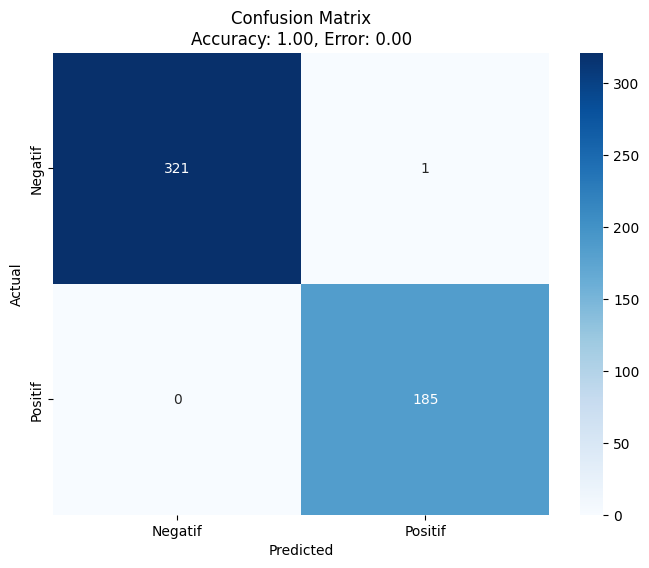

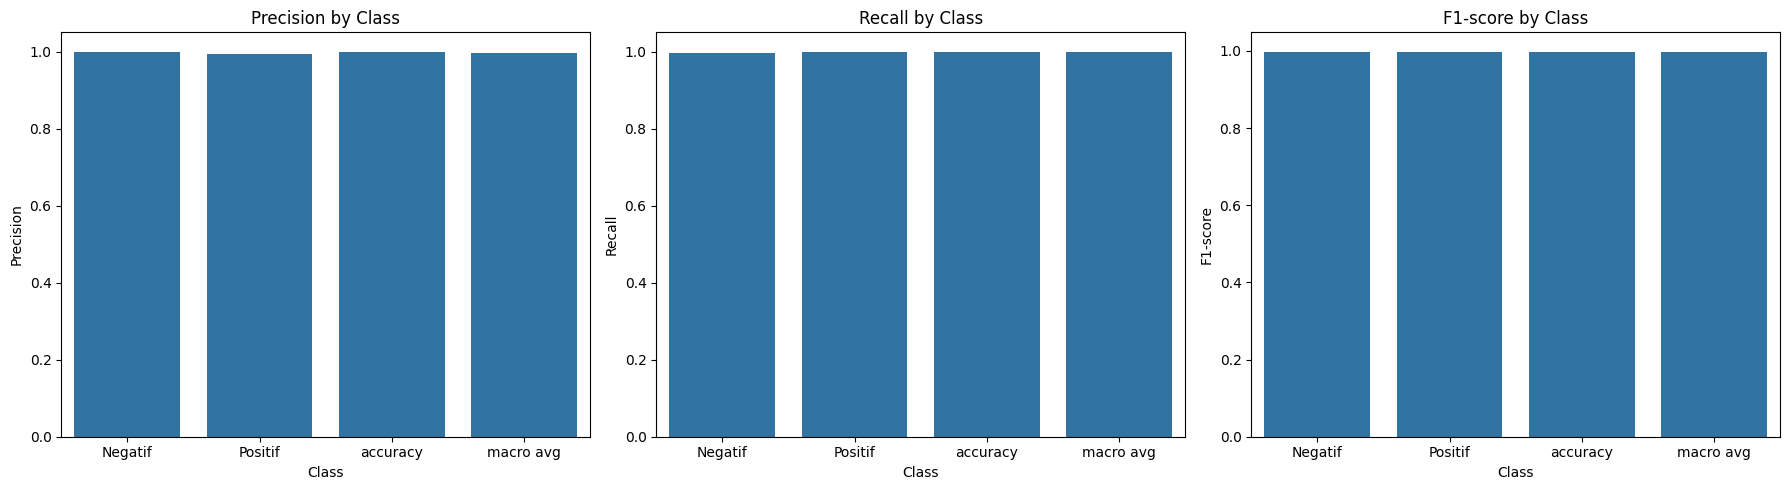

In [25]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_score = 1 - accuracy
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=bnb.classes_, yticklabels=bnb.classes_)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, Error: {error_score:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics = ['precision', 'recall', 'f1-score']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, metric in enumerate(metrics):
    sns.barplot(x=report_df.index[:-1], y=report_df[metric][:-1], ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} by Class')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(metric.capitalize())
plt.tight_layout()
plt.show()

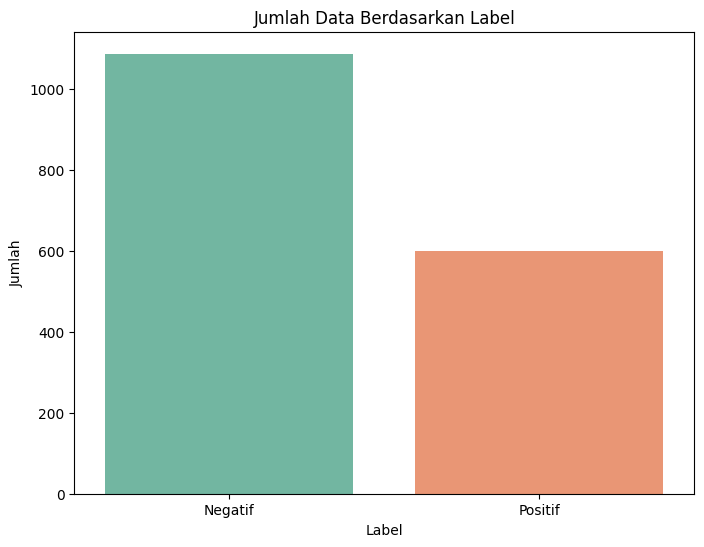

In [26]:
# Display the count of each label in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data, hue='Label', palette='Set2', legend=False)
plt.title('Jumlah Data Berdasarkan Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()


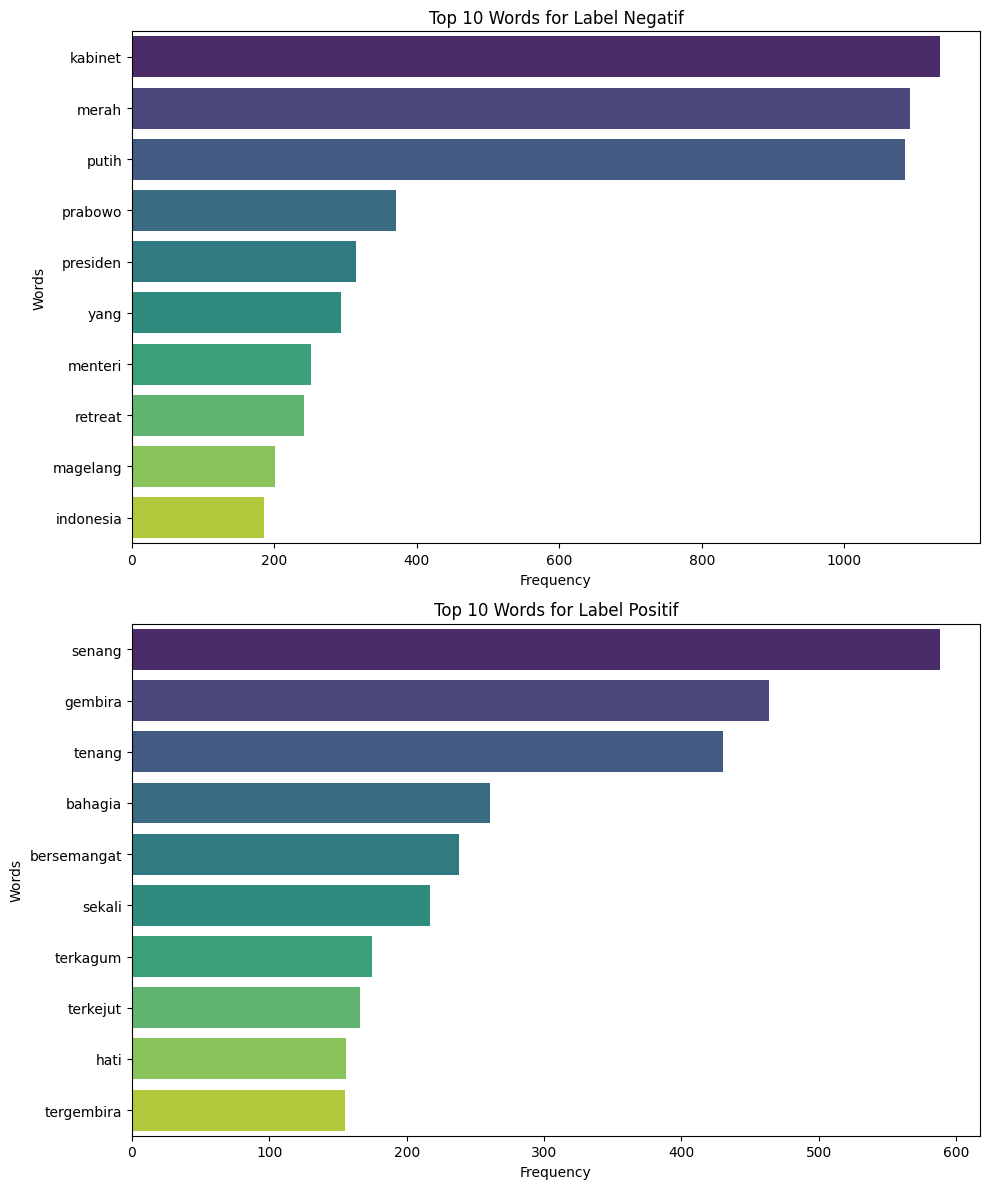

In [27]:
# Get words for each label
data['Label'] = data['Label'].astype(str)  # Ensure labels are strings
words_by_label = {label: [] for label in data['Label'].unique()}

# Collect words for each label
for i, row in data.iterrows():
    words_by_label[row['Label']].extend(row['Words'].split())

# Plot top 10 most frequent words for each label
fig, axes = plt.subplots(len(words_by_label), 1, figsize=(10, len(words_by_label)*6))

# If there's only one label, make axes iterable
if len(words_by_label) == 1:
    axes = [axes]

for i, (label, words) in enumerate(words_by_label.items()):
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(10)  # Get top 10 most common words
    
    # Separate word and count for plotting
    words, counts = zip(*most_common_words)
    
    sns.barplot(x=list(counts), y=list(words), ax=axes[i], hue=list(words), palette="viridis", legend=False)
    axes[i].set_title(f'Top 10 Words for Label {label}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Words')

plt.tight_layout()
plt.show()

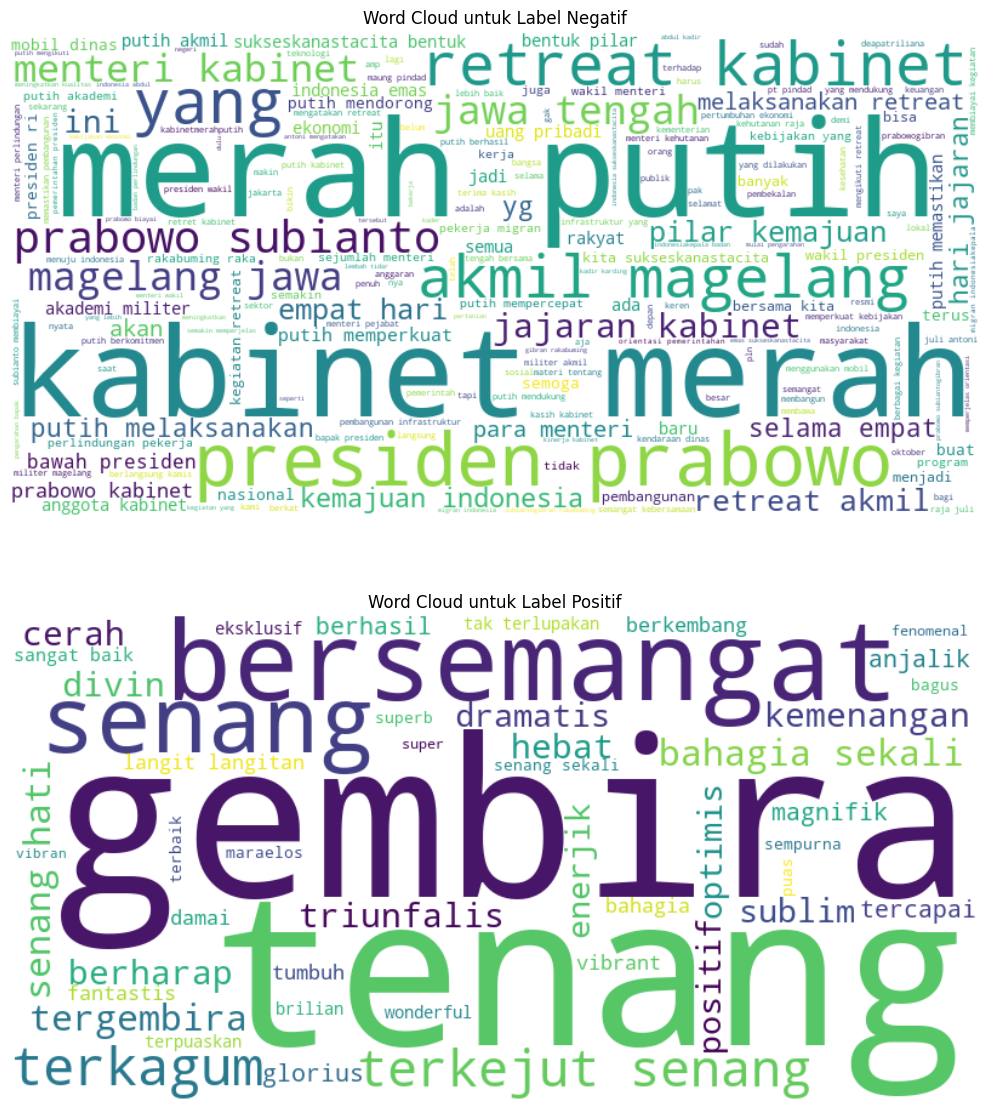

In [28]:
# Pastikan Label dalam bentuk string
data['Label'] = data['Label'].astype(str)

# Buat Word Cloud untuk setiap label
fig, axes = plt.subplots(len(words_by_label), 1, figsize=(10, len(words_by_label) * 6))

# Jika hanya ada satu label, jadikan axes iterable
if len(words_by_label) == 1:
    axes = [axes]

for i, (label, words) in enumerate(words_by_label.items()):
    text = ' '.join(words)  # Gabungkan kata-kata menjadi satu string
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f'Word Cloud untuk Label {label}')

plt.tight_layout()
plt.show()